<a href="https://colab.research.google.com/github/levidasilvalima/RNA-PP1/blob/master/RedesNeuraisArtificiais_Projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas e importações

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objects as go
import math
from scipy.stats import pearsonr
from datetime import datetime

# Conexão com o Drive

In [2]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# Importar CSV

- CSV baixado no dia 31-07-2020

In [3]:
df = pd.read_csv('/content/drive/My Drive/RNAFiles/Manaus.csv', sep=';', encoding='ISO-8859-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12,15,22,24,30,31,32,33,35) have mixed types.Specify dtype option on import or set low_memory=False.



# Visão Geral dos Casos Confirmados


## Quantos atributos descrevem cada exemplo? Quais são eles?

In [4]:
print(df.columns.size, "Valores descrevem cada exemplo")
print("Sendo eles: \n", df.columns.values)

36 Valores descrevem cada exemplo
Sendo eles: 
 ['_idade' '_faixa etária' '_sexo' '_bairro' '_classificacao'
 '_comorb_renal' '_comorb_diabetes' '_comorb_imuno' '_comorb_cardio'
 '_conclusao' '_dt_notificacao' '_taxa' '_dt_evolucao' '_raca'
 '_dt_sintomas' '_criterio' '_tipo_teste' '_sintoma_garganta'
 '_sintoma_dispneia' '_sintoma_febre' '_sintoma_tosse' '_sintoma_outros'
 '_etnia' '_profiss_saude' '_srag' '_se_notificacao' '_distrito'
 '_bairro_mapa' '_comorb_respiratoria' '_comorb_cromossomica'
 '_comorb_hepatica' '_comorb_neurologica' '_comorb_hemato'
 '_comorb_obessidade' '_origem' '_evolução']


## Quantos casos confirmados há em Manaus, cumulativamente?

In [5]:
filter = df['_classificacao'] == "Confirmado"
df = df[filter] # Filtrar por casos confirmados
print("\nEm manaus há", len(df), "casos confirmados")


Em manaus há 36671 casos confirmados


## A qual período de tempo a base de dados se refere, isto é, qual o registro mais antigo e qual o mais recente? Leve em conta a data de notificação.

In [6]:
ordered = df.sort_values(by='_dt_notificacao', ascending=True)
notNullFilter = pd.notnull(ordered["_dt_notificacao"]) 
ordered = ordered[notNullFilter]
initialDate = ordered.head(1)['_dt_notificacao'].values[0]
endDate = ordered.iloc[::-1].head(1)['_dt_notificacao'].values[0]
print("\nO periodo de tempo da base de dados vai de", initialDate, "a", endDate)


O periodo de tempo da base de dados vai de 01/04/2020 a 31/07/2020


## Limpeza do dataset

In [7]:
df = df.drop(columns=['_comorb_renal', 
                      '_comorb_diabetes', 
                      '_comorb_imuno', 
                      '_comorb_cardio', 
                      '_comorb_respiratoria', 
                      '_comorb_cromossomica', 
                      '_comorb_hepatica', 
                      '_comorb_neurologica', 
                      '_comorb_hemato', 
                      '_comorb_obessidade'])                         # Apagar atributos relativos a comorbidades
df = df.drop(columns=['_sintoma_garganta', 
                      '_sintoma_dispneia', 
                      '_sintoma_febre', 
                      '_sintoma_tosse', 
                      '_sintoma_outros'])                            # Apagar atributos relativos a sintomas
df = df.drop(columns=['_etnia', '_raca'])                            # Apagar atributos relativos a etnia
df = df.drop(columns=['_profiss_saude'])                             # Apagar atributos relativos a profissao
df = df.drop(columns=['_dt_evolucao',
                      '_dt_sintomas'])                               # Apagar atributos data exceto a de notificação
df = df.drop(columns=['_origem'])                                    # Apagar atributos relativos a origem
df = df.drop(columns=['_evolução',
                      '_criterio'])                                  # Apagar atributos desnecessarios
# df = df.dropna(subset=df.columns.values)                             # Apagar linhas com atributos nulos


## Quantos exemplos e atributos há na base de dados após a limpeza e organização?

In [8]:
print("Apos a limpesa e organização do dataset, há", len(df), "exemplos descritos por", len(df.columns.values), "atributos cada\n")

Apos a limpesa e organização do dataset, há 36671 exemplos descritos por 13 atributos cada



## Qual a porcentagem de indivíduos recuperados em relação ao todo?

In [9]:
filterRecovered = df['_conclusao'] == "Recuperado" # Filtrar por casos recuperados
dfRecovered = df[filterRecovered]
percent = round((len(dfRecovered)/len(df))*100, 2)
print("A porcentagem de recuperados é de " + str(percent) + "% do todo\n")

A porcentagem de recuperados é de 30.72% do todo



### Gráfico para ilustrar curados em relação a não curados

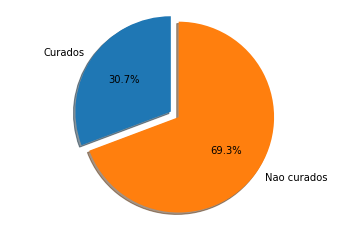

In [10]:
labels = 'Curados', 'Nao curados'
sizes = [percent, 100-percent] 
explode = (0.1, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)  
ax1.axis('equal')  
plt.show()

## Os casos acometeram mais indivíduos do sexo masculino ou feminino?

In [11]:
filterWomen = df['_sexo'] == "F" # Filtrar por individuos mulher
qtdDfWomen = len(df[filterWomen])
filterMen = df['_sexo'] == "M" # Filtrar por individuos homem
qtdDfmen = len(df[filterMen])
print ("Casos acometidos mais a individuos do sexo",  "masculino" if qtdDfmen>qtdDfWomen else "feminino", "\n")

Casos acometidos mais a individuos do sexo feminino 



### Gráfico de Barras para visualização da quandidade de casos por sexo

In [12]:
fig = go.Figure()
fig.add_trace(go.Bar(x=['Masculino', 'Feminino'],y=[qtdDfmen,qtdDfWomen ]))
fig.update_layout(autosize=False,width=500,height=500,)
fig.show()

## Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?

In [13]:
filterCovid = df['_srag'] == "COVID-19" # Filtrar por casos de COVID-19
dfCovid = df[filterCovid]
mean = round(dfCovid["_idade"].mean(),0)
standardDeviation = round(dfCovid["_idade"].std(),2)
minAge = dfCovid["_idade"].min()
maxAge = dfCovid["_idade"].max()
print("\nA média e o desvio padrão da idade dos individuos que contrairam COVID-19 é respectivamente:", mean, "e", standardDeviation)
print("\nA Menor e a maior idade sao respectivamente", minAge, "e", maxAge, "anos")


A média e o desvio padrão da idade dos individuos que contrairam COVID-19 é respectivamente: 56.0 e 21.07

A Menor e a maior idade sao respectivamente 0.0 e 106.0 anos


## Qual o bairro com maior incidência de casos?

In [14]:
dfBairro = df.groupby(["_bairro"]).count()
maxOccurence = dfBairro.max()["_idade"]
filterMax = dfBairro["_idade"] == maxOccurence
bairro = dfBairro[filterMax].index[0]
print("\nO bairro com maior ocorrencia de casos é:", bairro, "com", maxOccurence, "casos")


O bairro com maior ocorrencia de casos é: CIDADE NOVA com 2008 casos


## Quais os três bairros com maior incidência de casos recuperados?

In [15]:
dfBairro = df[filterRecovered]

dfBairro = dfBairro.groupby(["_bairro", "_conclusao"]).count()
dfBairro = dfBairro.sort_values(by="_idade", ascending=False).index
first = dfBairro[0][0]
second = dfBairro[1][0]
third = dfBairro[2][0]
print("\nOs 3 bairros com maior incidencia de casos recuperados sao respectivamente:", first, "," , second, "e" , third)


Os 3 bairros com maior incidencia de casos recuperados sao respectivamente: CIDADE NOVA , FLORES e CENTRO


## Quais os tipos de testes efetuados, segundo os dados? Indique os dados de maneira quantitativa e percentual.

In [16]:
dfTipoTeste = df.groupby(["_tipo_teste"]).count()
typeTest = df.groupby(["_tipo_teste"]).count().index
allTests = df.groupby(["_tipo_teste"]).count().sum()["_idade"]
types = []
quantity = []
percentage = []
for i in typeTest:
  types.append(i)
print("\nSão", len(types), "tipos de testes efetuados, sendo eles:", types)


São 5 tipos de testes efetuados, sendo eles: ['ECLIA IgG', 'ELISA IgM', 'RT-PCR', 'TESTE RÁPIDO - ANTICORPO', 'TESTE RÁPIDO - ANTÍGENO']


### Gráfico de Pizza para rerepsentar o percentual dos testes

<Figure size 432x288 with 0 Axes>

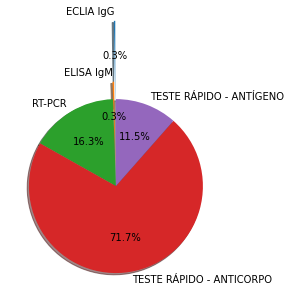

In [17]:
percentual = []
plt.clf()
total = dfTipoTeste["_idade"].sum()
for i in range (len(dfTipoTeste["_idade"])):
  atual = dfTipoTeste["_idade"][i]
  percentual.append((atual/total)*100)
labels = types
sizes = percentual 
explode = (0.9,0.2,0, 0, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)  
# ax1.axis('equal')  
plt.show()

### Gráfico de barras para representação quantitativa dos tipos de teste

In [18]:
fig = go.Figure()
fig.add_trace(go.Bar(x=types,y=dfTipoTeste["_idade"]))
fig.update_layout(autosize=False,width=500,height=500,)
fig.show()

## Qual taxa de letalidade pode ser calculada a partir do conjunto de dados?

In [19]:
filterDeath = df['_conclusao'] != "Recuperado"
print("A taxa de letalidade é de %.2f%%"%(len(df[filterDeath]) * 100 / len(df)))

A taxa de letalidade é de 69.28%


## Qual o tipo de correlação, mediante coeficiente de correlação de Pearson, entre a idade e o número de casos?

In [20]:
dfByAge = df.groupby("_idade")
ages = dfByAge.groups.keys()
ages = list(ages)
values = dfByAge.count()['_sexo'].to_list()
corr, _ = pearsonr(ages, values)
print("O coeficiente de correlação de Pearson é de", corr, "e ela é", "positiva" if corr >= 0 else "negativa. Sua intensidade é baixa")


O coeficiente de correlação de Pearson é de -0.33098903536053836 e ela é negativa. Sua intensidade é baixa


### Gráfico mostrando a quantidade de casos por idade

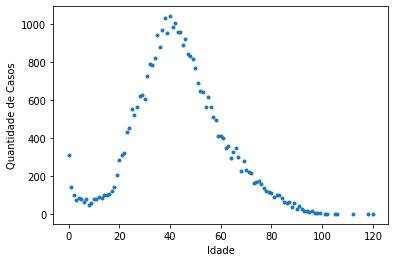

In [21]:
plt.ylabel('Quantidade de Casos')
plt.xlabel('Idade')
plt.plot(ages, values, '.')

# Tópico 2.2 Visualização de dados

## Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. Inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual;

In [22]:
dfBairro = df.groupby(["_bairro"]).count()
dfBairroTop10 = dfBairro.sort_values(by="_idade", ascending=False).head(10)
total = dfBairro.sum()["_idade"]
values = []
labels = []
acum=0.0
for i in dfBairroTop10["_idade"]:
  per = (i/total)*100 
  values.append(per)
  acum+=per
for i in dfBairroTop10.index:
  labels.append(i)
values.append(100-acum)
labels.append("OUTROS")
fig = go.Figure()
fig.add_trace(go.Bar(x=labels,y=values))
fig.update_layout(autosize=False,width=600,height=500,)
fig.show()

## Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?

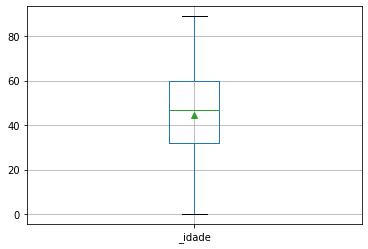

In [23]:
dfc = df.dropna(subset=df.columns.values)
dfAges = pd.DataFrame(dfc[dfc['_classificacao'] == 'Confirmado']['_idade'])
dfAges.boxplot(showmeans=True)

## Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados;

In [24]:
dfDay = df.sort_values(by="_dt_notificacao", ascending=True)
indexes = dfDay.groupby(["_dt_notificacao"]).count()
arrayDay = []
for i in indexes.index:
  date = datetime.strptime(i, '%d/%m/%Y').date()
  arrayDay.append(date)
arrayDay.sort(reverse=True)
arrayDayTop10 = []
for i in range (10):
  arrayDayTop10.append(arrayDay[i].strftime("%d/%m/%Y"))
values = []
for j in arrayDayTop10:
  for i in range(len(indexes.index)):
    if indexes.index[i] == j:
      values.append(indexes["_idade"][i])
fig = go.Figure()
fig.add_trace(go.Bar(x=arrayDayTop10,y=values))
fig.update_layout(autosize=False,width=600,height=500,)
fig.show()

## Repita o gráfico anterior considerando o número de casos recuperado;

In [25]:
filterRecovered = df['_conclusao'] == "Recuperado" # Filtrar por individuos recuperados
dfRecovered = df[filterRecovered]
indexes = dfRecovered.groupby(["_dt_notificacao"]).count()
arrayDay = []
for i in indexes.index:
  date = datetime.strptime(i, '%d/%m/%Y').date()
  arrayDay.append(date)
arrayDay.sort(reverse=True)
arrayDayTop10 = []
for i in range (10):
  arrayDayTop10.append(arrayDay[i].strftime("%d/%m/%Y"))
values = []
for j in arrayDayTop10:
  for i in range(len(indexes.index)):
    if indexes.index[i] == j:
      values.append(indexes["_idade"][i])
fig = go.Figure()
fig.add_trace(go.Bar(x=arrayDayTop10,y=values))
fig.update_layout(autosize=False,width=600,height=500,)
fig.show()

## Construa um histograma que denote a quantidade percentual de casos por grupo etário, considerando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.)

In [29]:
# "_faixa etária"
#dfFaixaEtaria = df["_faixa etária"]
#dfFaixaEtaria.head()

df0to10 = len(df[(df["_idade"] >= 0) & (df["_idade"] <= 10) & (df['_classificacao'] == "Confirmado")])
df11to20 = len(df[(df["_idade"] >= 11) & (df["_idade"] <= 20) & (df['_classificacao'] == "Confirmado")])
df21to20 = len(df[(df["_idade"] >= 21) & (df["_idade"] <= 30) & (df['_classificacao'] == "Confirmado")])
df31to40 = len(df[(df["_idade"] >= 31) & (df["_idade"] <= 40) & (df['_classificacao'] == "Confirmado")])
df41to50 = len(df[(df["_idade"] >= 41) & (df["_idade"] <= 50) & (df['_classificacao'] == "Confirmado")])
df51to60 = len(df[(df["_idade"] >= 51) & (df["_idade"] <= 60) & (df['_classificacao'] == "Confirmado")])
df61to70 = len(df[(df["_idade"] >= 61) & (df["_idade"] <= 70) & (df['_classificacao'] == "Confirmado")])
df71to80 = len(df[(df["_idade"] >= 71) & (df["_idade"] <= 80) & (df['_classificacao'] == "Confirmado")])
df81toINF = len(df[df["_idade"] >= 81])

print("Quantidade de casos x faixa etária")
fig = go.Figure()
fig.add_trace(go.Bar(x=["0 a 10", "11 a 20", "21 a 30", "31 a 40", "41 a 50", "51 a 60", "61 a 70", "71 a 80", "80+"],
                     y=[df0to10, df11to20, df21to20, df31to40, df41to50, df51to60, df61to70, df71to80, df81toINF]))
fig.update_layout(autosize=False,width=600,height=500,)
fig.show()

Quantidade de casos x faixa etária


## Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo;

36671
Gráfico de linha do desenvolvimento acumulativo do COVID-19


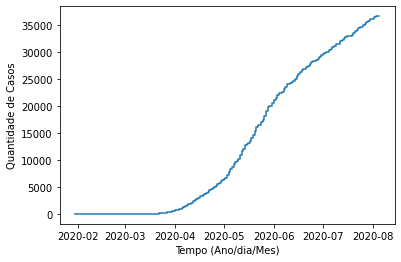

In [26]:
df['_dt_notificacao'] = pd.to_datetime(df['_dt_notificacao'], infer_datetime_format=True, format='%d/%m/%Y')
order = df.dropna(subset=['_dt_notificacao'])
indexes = order.groupby(["_dt_notificacao"]).size()

VetorCasosPorDia = []
VetorCasosPorDia.append(indexes[0])
for i in range(1, len(indexes)):
  VetorCasosPorDia.append(VetorCasosPorDia[i - 1] + indexes[i])

print(len(df['_dt_notificacao']))

# VetorTempo = []
# for i in range(0, len(indexes)):
#   VetorTempo.append(pd.Timestamp(indexes.index[i]))

plt.ylabel('Quantidade de Casos')
plt.xlabel('Tempo (Ano/dia/Mes)')
# plt.figure(figsize=(10,10))
plt.step(indexes.index, VetorCasosPorDia, '-')
#O eixo x desse gráfico está confuso, está ano/dia/mes

print("Gráfico de linha do desenvolvimento acumulativo do COVID-19")